In [110]:
import pandas as pd

# Load the corrected dataset with Kenya values fixed
df = pd.read_csv(r'C:\Users\clint\Desktop\RER\Code\22.csv')
print("✓ Loaded corrected dataset with fixed Kenya values")
print(f"Dataset shape: {df.shape}")
df.head()

✓ Loaded corrected dataset with fixed Kenya values
Dataset shape: (3980, 11)


,Sending_Country,Receiving_Country,Year,Value,Unit,Source,Region,Sending_Country_Code,Receiving_Country_Code,Sending_Country_GDP,Receiving_Country_GDP
0,Algeria,Senegal,2021,0.183414825,USD millions,BCEAO,Africa,DZA,SEN,1.994889e+05,24359.596784
1,Australia,Ethiopia,2020,13.59617511,USD millions,National Bank of Ethiopia,Africa,AUS,ETH,1.491063e+06,95071.775812
2,Australia,Kenya,2024,"184,497.099695719",USD millions,Central Bank of Kenya,Africa,AUS,KEN,1.665258e+06,104575.203136
3,Australia,Uganda,2022,22,USD millions,Bank of Uganda,Africa,AUS,UGA,1.587133e+06,44147.216890
4,Austria,Kenya,2024,"13,169.065145833",USD millions,Central Bank of Kenya,Africa,AUT,KEN,4.181904e+05,104575.203136


In [111]:
# Examine data structure
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset shape: (3980, 11)

Column names:
['Sending_Country', 'Receiving_Country', 'Year', 'Value', 'Unit', 'Source', 'Region', 'Sending_Country_Code', 'Receiving_Country_Code', 'Sending_Country_GDP', 'Receiving_Country_GDP']

First few rows:


,Sending_Country,Receiving_Country,Year,Value,Unit,Source,Region,Sending_Country_Code,Receiving_Country_Code,Sending_Country_GDP,Receiving_Country_GDP
0,Algeria,Senegal,2021,0.183414825,USD millions,BCEAO,Africa,DZA,SEN,1.994889e+05,24359.596784
1,Australia,Ethiopia,2020,13.59617511,USD millions,National Bank of Ethiopia,Africa,AUS,ETH,1.491063e+06,95071.775812
2,Australia,Kenya,2024,"184,497.099695719",USD millions,Central Bank of Kenya,Africa,AUS,KEN,1.665258e+06,104575.203136
3,Australia,Uganda,2022,22,USD millions,Bank of Uganda,Africa,AUS,UGA,1.587133e+06,44147.216890
4,Austria,Kenya,2024,"13,169.065145833",USD millions,Central Bank of Kenya,Africa,AUT,KEN,4.181904e+05,104575.203136


In [112]:
# Filter data for US as sending country
us_flows = df[df['Sending_Country'] == 'United States'].copy()

print(f"Number of US remittance flows: {len(us_flows)}")
print(f"\nReceiving countries from US ({us_flows['Receiving_Country'].nunique()} countries):")
print(us_flows['Receiving_Country'].unique())
print(f"\nYears available: {sorted(us_flows['Year'].unique())}")

# Check Value column format
print(f"\nValue column sample:")
print(us_flows['Value'].head(10))
print(f"Value data type: {us_flows['Value'].dtype}")

us_flows.head(10)

Number of US remittance flows: 47

Receiving countries from US (19 countries):
['Ethiopia' 'Kenya' 'Morocco' 'Senegal' 'Uganda' 'Armenia' 'Brazil'
 'Cabo Verde' 'Dominican Republic' 'Georgia' 'Haiti' 'Jamaica'
 'Kyrgyz Republic' 'Nicaragua' 'Pakistan' 'Paraguay' 'Philippines' 'Samoa'
 'Suriname']

Years available: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2024)]

Value column sample:
122          387.04401602
123              2.637772
124            422.388121
125         479.695927280
126                 184.5
731             223.97581
732    280.91130599999997
733            458.719932
779                1077.2
780                1229.6
Name: Value, dtype: object
Value data type: object


,Sending_Country,Receiving_Country,Year,Value,Unit,Source,Region,Sending_Country_Code,Receiving_Country_Code,Sending_Country_GDP,Receiving_Country_GDP
122,United States,Ethiopia,2020,387.04401602,USD millions,National Bank of Ethiopia,Africa,USA,ETH,1.972358e+07,9.507178e+04
123,United States,Kenya,2024,2.637772,USD millions,Central Bank of Kenya,Africa,USA,KEN,2.267949e+07,1.045752e+05
124,United States,Morocco,2020,422.388121,USD millions,Bank Al-Maghrib,Africa,USA,MAR,1.972358e+07,1.147760e+05
125,United States,Senegal,2021,479.695927280,USD millions,BCEAO,Africa,USA,SEN,2.091785e+07,2.435960e+04
126,United States,Uganda,2022,184.5,USD millions,Bank of Uganda,Africa,USA,UGA,2.144339e+07,4.414722e+04
731,United States,Armenia,2018,223.97581,USD millions,Roland Kpodar (IMF),Asia,USA,ARM,1.965187e+07,1.195864e+04
732,United States,Armenia,2019,280.91130599999997,USD millions,Roland Kpodar (IMF),Asia,USA,ARM,2.015964e+07,1.286750e+04
733,United States,Armenia,2020,458.719932,USD millions,Roland Kpodar (IMF),Asia,USA,ARM,1.972358e+07,1.194104e+04
779,United States,Brazil,2018,1077.2,USD millions,Roland Kpodar (IMF),Latin America,USA,BRA,1.965187e+07,1.797737e+06
780,United States,Brazil,2019,1229.6,USD millions,Roland Kpodar (IMF),Latin America,USA,BRA,2.015964e+07,1.819683e+06


In [113]:
# Clean and prepare US flows data
import numpy as np

# Convert Value column to numeric, removing commas
us_flows['Value_Clean'] = pd.to_numeric(us_flows['Value'].astype(str).str.replace(',', ''), errors='coerce')

# Remove any rows with NaN values
us_flows = us_flows.dropna(subset=['Value_Clean'])

print(f"After cleaning: {len(us_flows)} flows")
print(f"Value range: ${us_flows['Value_Clean'].min():.2f}M to ${us_flows['Value_Clean'].max():,.2f}M")

# Calculate average flows over the last 10 years
latest_year = us_flows['Year'].max()
ten_years_ago = latest_year - 9  # Last 10 years including current year
print(f"\nCalculating averages from {ten_years_ago} to {latest_year} (last 10 years)")

# Filter data to last 10 years
us_flows_last_10 = us_flows[us_flows['Year'] >= ten_years_ago].copy()

print(f"Data available in last 10 years: {len(us_flows_last_10)} flows")
print(f"Years with data: {sorted(us_flows_last_10['Year'].unique())}")

# Calculate average flows per country over the last 10 years
us_flows_agg = us_flows_last_10.groupby(['Receiving_Country', 'Receiving_Country_Code']).agg({
    'Value_Clean': 'mean',  # Changed from 'sum' to 'mean'
    'Year': ['count', 'min', 'max']
}).reset_index()

# Flatten column names
us_flows_agg.columns = ['Receiving_Country', 'Receiving_Country_Code', 'Value_Clean', 'Number_of_Years', 'First_Year', 'Last_Year']

print(f"\nAverage flows to {len(us_flows_agg)} countries (last 10 years):")
us_flows_agg.sort_values('Value_Clean', ascending=False)

After cleaning: 47 flows
Value range: $0.21M to $11,318.34M

Calculating averages from 2015 to 2024 (last 10 years)
Data available in last 10 years: 47 flows
Years with data: [np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2024)]

Average flows to 19 countries (last 10 years):


,Receiving_Country,Receiving_Country_Code,Value_Clean,Number_of_Years,First_Year,Last_Year
14,Philippines,PHL,10709.664313,3,2018,2020
3,Dominican Republic,DOM,5752.746147,3,2018,2020
6,Haiti,HTI,1682.957239,3,2018,2020
7,Jamaica,JAM,1360.324533,3,2018,2020
1,Brazil,BRA,1288.933333,3,2018,2020
11,Nicaragua,NIC,955.800000,3,2018,2020
16,Senegal,SEN,479.695927,1,2021,2021
10,Morocco,MAR,422.388121,1,2020,2020
4,Ethiopia,ETH,387.044016,1,2020,2020
0,Armenia,ARM,321.202349,3,2018,2020


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Create choropleth map using country codes
fig = px.choropleth(
    us_flows_agg,
    locations='Receiving_Country_Code',  # Country codes for mapping
    color='Value_Clean',  # Values to color-code
    hover_name='Receiving_Country',  # Country names on hover
    hover_data={
        'Value_Clean': ':,.2f',  # Format as currency
        'Number_of_Years': True,
        'Receiving_Country_Code': False  # Hide country code from hover
    },
    color_continuous_scale='Viridis',
    title='Kenya Fixed: Average Annual US Remittance Flows by Receiving Country (2015-2024)<br><sub>Values in Millions USD</sub>',
    labels={'Value_Clean': 'Avg Annual Remittances (Millions USD)'}
)

# Update layout for better visualization
fig.update_layout(
    title_x=0.5,  # Center the title
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='equirectangular'
    ),
    width=1200,
    height=700
)

# Show the map
fig.show()

# Display summary statistics
print("Map Statistics:")
print(f"Countries visualized: {len(us_flows_agg)}")
print(f"Total average annual remittances: ${us_flows_agg['Value_Clean'].sum():,.2f}M")
print(f"Highest recipient: {us_flows_agg.loc[us_flows_agg['Value_Clean'].idxmax(), 'Receiving_Country']} (${us_flows_agg['Value_Clean'].max():,.2f}M)")
print(f"Lowest recipient: {us_flows_agg.loc[us_flows_agg['Value_Clean'].idxmin(), 'Receiving_Country']} (${us_flows_agg['Value_Clean'].min():,.2f}M)")

Map Statistics:
Countries visualized: 19
Total average annual remittances: $23,761.04M
Highest recipient: Philippines ($10,709.66M)
Lowest recipient: Georgia ($0.26M)


ALL US REMITTANCE RECEIVING COUNTRIES (2015-2024 Average)
 Rank            Country Avg Annual Remittances  Years of Data
    1        Philippines            $10,709.66M              3
    2 Dominican Republic             $5,752.75M              3
    3              Haiti             $1,682.96M              3
    4            Jamaica             $1,360.32M              3
    5             Brazil             $1,288.93M              3
    6          Nicaragua               $955.80M              3
    7            Senegal               $479.70M              1
    8            Morocco               $422.39M              1
    9           Ethiopia               $387.04M              1
   10            Armenia               $321.20M              3
   11             Uganda               $184.50M              1
   12           Paraguay                $75.86M              3
   13         Cabo Verde                $43.90M              3
   14              Samoa                $36.29M             

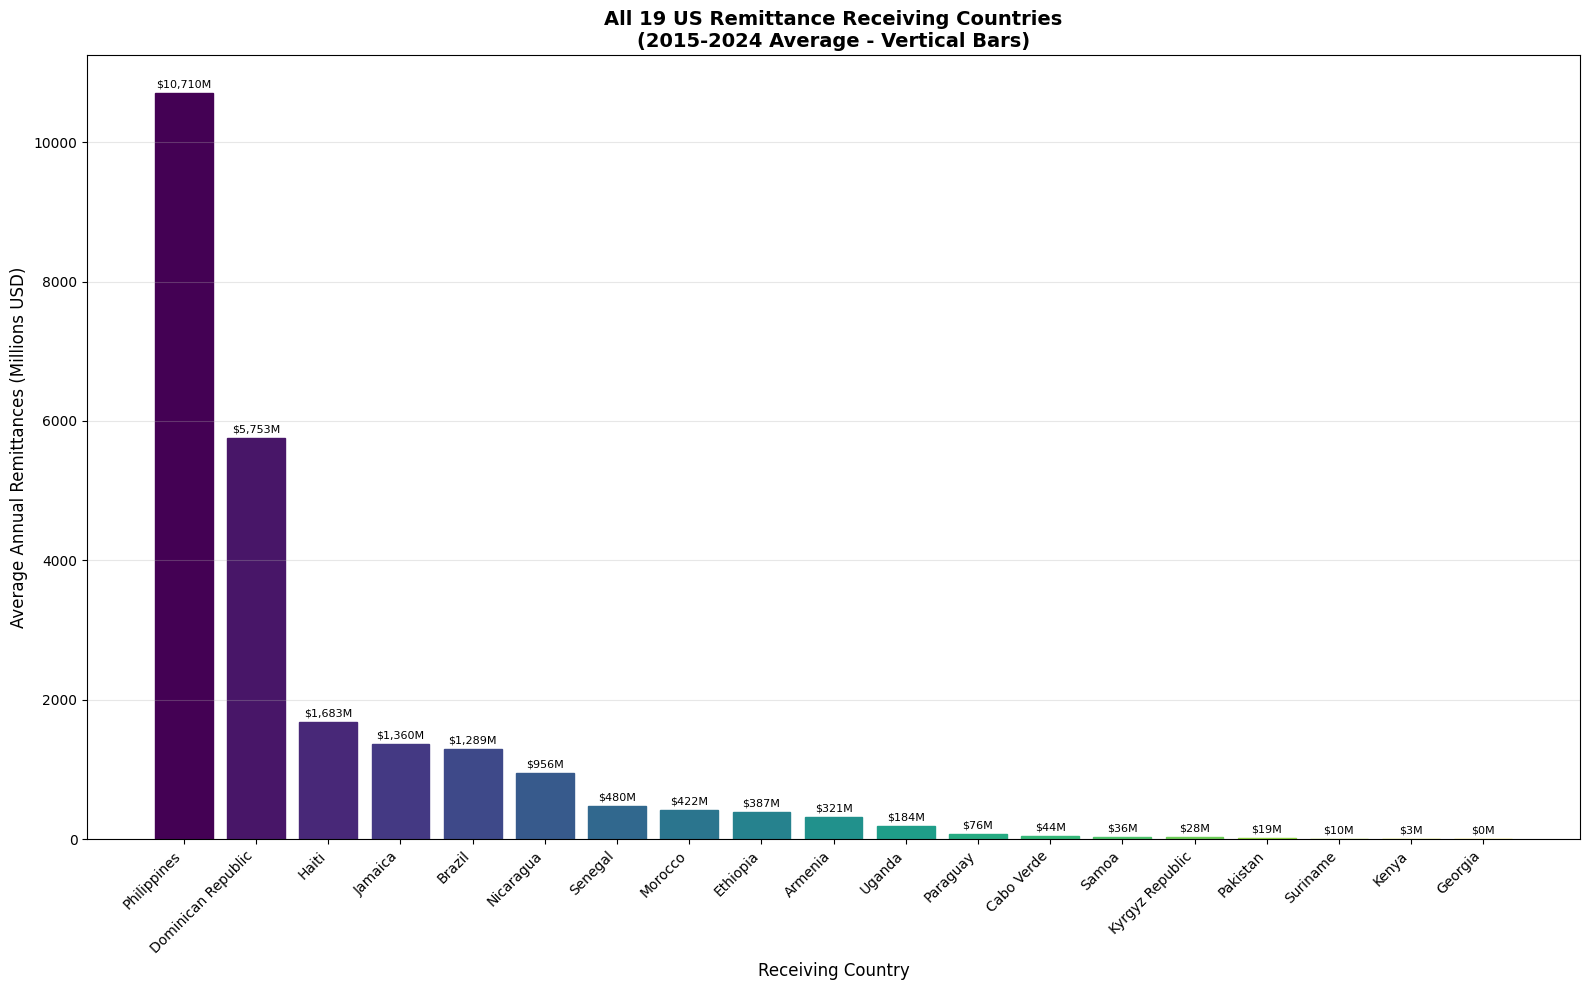

In [116]:
# Top receiving countries visualization - ALL COUNTRIES with VERTICAL bars
import matplotlib.pyplot as plt
import seaborn as sns

# Sort countries by remittance values and get all countries (we only have 19 total)
all_countries = us_flows_agg.sort_values('Value_Clean', ascending=False).reset_index(drop=True)

print("ALL US REMITTANCE RECEIVING COUNTRIES (2015-2024 Average)")
print("=" * 65)

# Display all countries in a formatted table
all_countries_display = all_countries.copy()
all_countries_display['Rank'] = range(1, len(all_countries_display) + 1)
all_countries_display['Value_Formatted'] = all_countries_display['Value_Clean'].apply(lambda x: f"${x:,.2f}M")

# Reorder columns for display
display_cols = ['Rank', 'Receiving_Country', 'Value_Formatted', 'Number_of_Years']
table_display = all_countries_display[display_cols]
table_display.columns = ['Rank', 'Country', 'Avg Annual Remittances', 'Years of Data']

print(table_display.to_string(index=False))
print(f"\nTotal countries: {len(us_flows_agg)}")

# Create VERTICAL bar chart (flipped axis)
plt.figure(figsize=(16, 10))

# Create vertical bar chart 
bars = plt.bar(range(len(all_countries_display)), all_countries_display['Value_Clean'])

# Color gradient
colors = plt.cm.viridis(np.linspace(0, 1, len(all_countries_display)))
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.ylabel('Average Annual Remittances (Millions USD)', fontsize=12)
plt.xlabel('Receiving Country', fontsize=12)
plt.title(f'All {len(all_countries_display)} US Remittance Receiving Countries\n(2015-2024 Average - Vertical Bars)', fontsize=14, fontweight='bold')

# Set country names on x-axis with rotation for readability
plt.xticks(range(len(all_countries_display)), all_countries_display['Receiving_Country'], 
           rotation=45, ha='right', fontsize=10)

# Add value labels on top of bars
for i, (country, value) in enumerate(zip(all_countries_display['Receiving_Country'], all_countries_display['Value_Clean'])):
    plt.text(i, value + 50, f'${value:,.0f}M', ha='center', va='bottom', fontsize=8, rotation=0)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Create a plotly interactive VERTICAL bar chart as well
fig_bar = px.bar(
    all_countries,
    x='Receiving_Country',
    y='Value_Clean',
    title=f'All {len(all_countries)} US Remittance Receiving Countries (2015-2024 Average) - Interactive',
    labels={'Value_Clean': 'Average Annual Remittances (Millions USD)', 'Receiving_Country': 'Country'},
    text='Value_Clean',
    color='Value_Clean',
    color_continuous_scale='Viridis'
)

fig_bar.update_traces(texttemplate='$%{text:,.0f}M', textposition='outside')
fig_bar.update_layout(
    xaxis={'categoryorder': 'total descending'},
    title_x=0.5,
    width=1000,
    height=700,
    showlegend=False,
    xaxis_tickangle=-45
)

fig_bar.show()